In [1]:
import arxiv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
import re
from string import punctuation
from wordcloud import WordCloud, STOPWORDS

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/diyosko7/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/diyosko7/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Arxiv データ取得（Title に "semiconductor" が含まれるものを抽出）

In [2]:
papers = arxiv.query(
                        query="ti:semiconductor", 
                        max_results=None,
                        sort_by="submittedDate"
                        )

In [3]:
columns = ["id","updated","published","title","summary","authors","tags"]
papers_df = pd.DataFrame(papers,columns=columns)
print(papers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         4000 non-null   object
 1   updated    4000 non-null   object
 2   published  4000 non-null   object
 3   title      4000 non-null   object
 4   summary    4000 non-null   object
 5   authors    4000 non-null   object
 6   tags       4000 non-null   object
dtypes: object(7)
memory usage: 218.9+ KB
None


In [4]:
papers_df.head()

,id,updated,published,title,summary,authors,tags
0,http://arxiv.org/abs/2005.01205v1,2020-05-03T23:24:10Z,2020-05-03T23:24:10Z,Electronic Structure of Amorphous Copper Iodid...,The atomic and electronic structure of the p-t...,"[Zhaofu Zhang, Yuzheng Guo, John Robertson]","[{'term': 'cond-mat.mtrl-sci', 'scheme': 'http..."
1,http://arxiv.org/abs/2005.01174v1,2020-05-03T20:04:51Z,2020-05-03T20:04:51Z,MoS$_2$-on-paper optoelectronics: drawing phot...,We fabricate paper-supported semiconducting de...,"[Ali Mazaheri, Riccardo Frisenda, Andres Caste...","[{'term': 'physics.app-ph', 'scheme': 'http://..."
2,http://arxiv.org/abs/2005.00609v1,2020-05-01T21:05:24Z,2020-05-01T21:05:24Z,Thiophene-Tetrathia-Annulene monolayer (TTA-2D...,We propose a new 2D semiconductor material (TT...,"[Raphael M. Tromer, Leonardo D. Machado, Crist...","[{'term': 'cond-mat.mtrl-sci', 'scheme': 'http..."
3,http://arxiv.org/abs/2005.00277v1,2020-05-01T09:14:43Z,2020-05-01T09:14:43Z,Accuracy of hybrid functionals with non-self-c...,Accurately modeling the electronic structure o...,"[Jonathan M. Skelton, David S. D. Gunn, Sebast...","[{'term': 'cond-mat.mtrl-sci', 'scheme': 'http..."
4,http://arxiv.org/abs/2005.00241v1,2020-05-01T06:27:55Z,2020-05-01T06:27:55Z,Directly visualizing the momentum forbidden da...,Resolving the momentum degree of freedom of ex...,"[Julien Madéo, Michael K. L. Man, Chakradhar S...","[{'term': 'cond-mat.mtrl-sci', 'scheme': 'http..."


## Summary から名詞抽出

In [5]:
from tqdm import tqdm
def get_nounlist(text):
    tokenized = nltk.word_tokenize(text)
    noun_list = [word for (word, pos) in nltk.pos_tag(tokenized) if(pos[:2] == 'NN')]
    return noun_list
nouns_summarys = []
for text in tqdm(papers_df.summary.tolist()):
    nouns_summarys.append(" ".join(get_nounlist(text)))
print("noun num: "+ str(len(" ".join(nouns_summarys).split())))

100%|██████████| 4000/4000 [00:26<00:00, 151.82it/s]


noun num: 180920


## WordCloud 描写

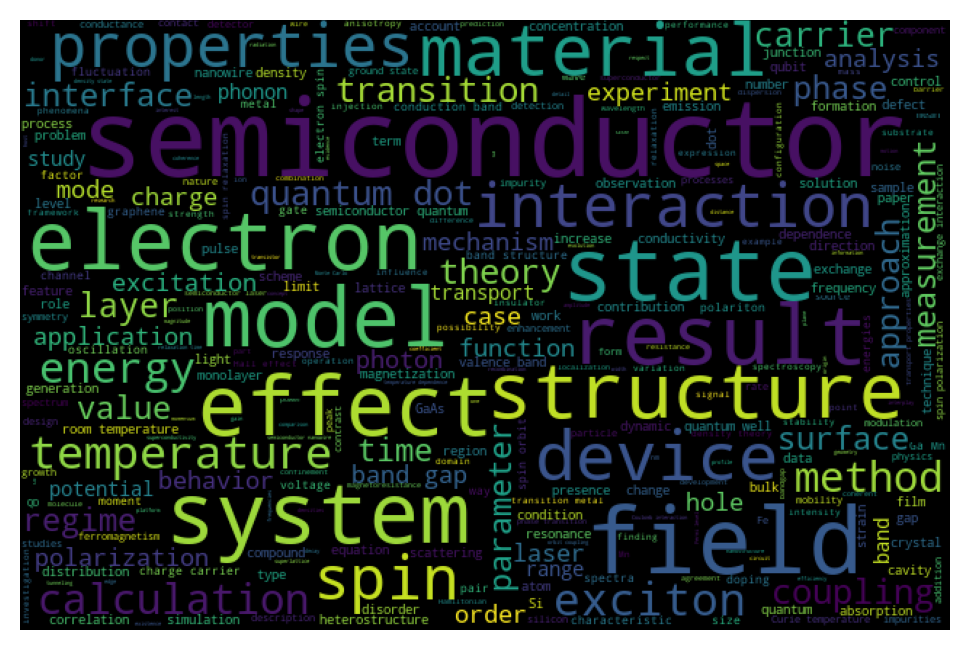

In [6]:
def plot_wordcloud(wordcloud):
    plt.figure(figsize=(6,8),dpi=200)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud = WordCloud(stopwords=STOPWORDS, max_words=300,height=420,width=640)
wordcloud.generate(" ".join(nouns_summarys))
wordcloud.to_file('../images/wordcloud_nouns.png')
plot_wordcloud(wordcloud)

## 前処理済みWikipediaコーパスを用いたw2vモデルにおける、'semiconductor' との類似度TOP30 単語
シリコンが上位に来ているので、Wikipedia データにおける共起に基づく類似度としてはそれなりに納得感がありそう

In [7]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

corpus = api.load('text8') #  前処理済みWikipedia コーパス
model = Word2Vec(corpus)
model.most_similar(positive=['semiconductor'], topn = 30)

<ipython-input-7-1e2f05dba64c>:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(positive=['semiconductor'], topn = 30)


[('diodes', 0.8326932787895203),
 ('lasers', 0.8271822929382324),
 ('silicon', 0.8162027597427368),
 ('nanotube', 0.8145959973335266),
 ('transistor', 0.8056317567825317),
 ('semiconductors', 0.795965850353241),
 ('ccd', 0.7934492230415344),
 ('electronics', 0.7901291847229004),
 ('composite', 0.7876905798912048),
 ('hydraulic', 0.7842866778373718),
 ('diode', 0.7768861055374146),
 ('lightweight', 0.7759795784950256),
 ('generators', 0.7722843289375305),
 ('conductive', 0.7609143257141113),
 ('sensor', 0.7607554793357849),
 ('laser', 0.7606048583984375),
 ('crt', 0.7605851292610168),
 ('circuits', 0.7572972774505615),
 ('regenerative', 0.7468437552452087),
 ('scanner', 0.7458623647689819),
 ('amplifiers', 0.7442125082015991),
 ('detectors', 0.7431244850158691),
 ('pickups', 0.7430959343910217),
 ('lcds', 0.7415671348571777),
 ('capacitors', 0.740963339805603),
 ('freescale', 0.740662157535553),
 ('sensors', 0.7401682138442993),
 ('insulators', 0.7399996519088745),
 ('transistors', 0.73

## 取得した Arxiv Summary データを用いた w2v モデル構築

In [8]:
from time import time
from tqdm import tqdm
def get_nounlist(text):
    tokenized = nltk.word_tokenize(text)
    noun_list = [word for (word, pos) in nltk.pos_tag(tokenized) if(pos[:2] == 'NN')]
    return noun_list
nouns_summarys = []
for text in tqdm(papers_df.summary.tolist()):
    nouns_summarys.append(get_nounlist(text))

w2v_model_semicon = Word2Vec(size=100, window=5, min_count=1, workers=4)
print(len(nouns_summarys))
start_time = time()
w2v_model_semicon.build_vocab(nouns_summarys, progress_per=10000) #
print('Time to build vocab: {} mins'.format(round((time() - start_time) / 60, 2)))

start_time = time()
w2v_model_semicon.train(nouns_summarys, total_examples=w2v_model_semicon.corpus_count, epochs=30, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - start_time) / 60, 2)))

100%|██████████| 4000/4000 [00:26<00:00, 152.77it/s]


4000
Time to build vocab: 0.05 mins
Time to train the model: 0.06 mins


## 'semiconductor' との類似度 TOP50 単語
正規化していなかったのでトップに 'Semiconductor' が来てしまっている。Wikiより専門的な単語が多そう（当たり前）

In [9]:
w2v_model_semicon.most_similar(positive=['semiconductor'], topn = 50)

<ipython-input-9-f3a7342a0277>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  w2v_model_semicon.most_similar(positive=['semiconductor'], topn = 50)


[('Semiconductor', 0.45315390825271606),
 ('Due', 0.4397503435611725),
 ('multi-quantum', 0.42069435119628906),
 ('medium', 0.4104086458683014),
 ('turnstile', 0.407243549823761),
 ('controls', 0.4026380479335785),
 ('stubless', 0.4007193446159363),
 ('heterostructures', 0.39966297149658203),
 ('CPT', 0.3984951078891754),
 ('InAs/EuS/Al', 0.3955191969871521),
 ('GaAs-AlGaAs', 0.3953647017478943),
 ('AlGaAs/GaAs', 0.3941345810890198),
 ('-SbN', 0.39395108819007874),
 ('Modern', 0.39304691553115845),
 ('nanocavities', 0.3923885226249695),
 ('barriers', 0.38735371828079224),
 ('polyynes', 0.38561636209487915),
 ('luminescent', 0.38486406207084656),
 ('superconductor-semiconductor', 0.38449159264564514),
 ('manufacturability', 0.37999865412712097),
 ('free-standing', 0.3791786730289459),
 ('semiconducting', 0.379069983959198),
 ('GaAs/InGaAs', 0.37787356972694397),
 ('heterostructure', 0.3777948021888733),
 ('suspensions', 0.3760060667991638),
 ('exposes', 0.37460052967071533),
 ('wires', 

## 'GaAsBi' との類似度 TOP50 単語
上記専門用語に関連する単語が来ていれば良いけれど、判断がつかない

In [10]:
w2v_model_semicon.most_similar(positive=['GaAsBi'], topn = 50)

<ipython-input-10-afe17d67ec5e>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  w2v_model_semicon.most_similar(positive=['GaAsBi'], topn = 50)


[('Ge/1-x/Cr/x/Te', 0.6933281421661377),
 ('epitaxy', 0.6856086254119873),
 ('monocrystalline', 0.6837419867515564),
 ('Ge1-xMn', 0.677192211151123),
 ('two-phase', 0.671619176864624),
 ('epilayers', 0.6712820529937744),
 ('xTe', 0.6668637990951538),
 ('crystallines', 0.6586182117462158),
 ('DFS', 0.6565036773681641),
 ('holding', 0.6558811664581299),
 ('Fe3Si', 0.6553717851638794),
 ('MoSi2-type', 0.6526016592979431),
 ('ReSi2', 0.6495499610900879),
 ('droplet', 0.6490151882171631),
 ('hosts', 0.6487117409706116),
 ('tend', 0.6477855443954468),
 ('ErAs', 0.6471331119537354),
 ('Ge-As-Te', 0.6462627649307251),
 ('Ferromagnetism', 0.6446206569671631),
 ('BeMnTe', 0.6438935399055481),
 ('Li1.15', 0.6437568068504333),
 ('Vibration', 0.6428813934326172),
 ('GeMn', 0.6412553787231445),
 ('MBE', 0.6396304965019226),
 ('P4/nmm', 0.6391981244087219),
 ('polycrystalline', 0.6374826431274414),
 ('implantation', 0.6366828083992004),
 ('fulfill', 0.6309801340103149),
 ('Ge-Fe', 0.6300135850906372)

## 上手くいかない気がするが、LDA（Latent Dirichlet Allocation;LDA, 潜在的意味解析）を試す

In [13]:
import gensim
dictionary = gensim.corpora.Dictionary(nouns_summarys)
corpus = [dictionary.doc2bow(t) for t in nouns_summarys]
print('vocab size: ', len(dictionary))

tfidf = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

vocab size:  13222


In [14]:
#Metrics for Topic Models
start = 2
limit = 22
step = 1

coherence_vals = []
perplexity_vals = []

for n_topic in tqdm(range(start, limit, step)):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=n_topic, random_state=0)
    perplexity_vals.append(np.exp2(-lda_model.log_perplexity(corpus)))
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=nouns_summarys, dictionary=dictionary, coherence='c_v')
    coherence_vals.append(coherence_model_lda.get_coherence())

100%|██████████| 20/20 [03:29<00:00, 10.50s/it]


## 良さげなトピック数を探す（coherence大，perplexity小 が理想）
coherence がよくわからんグラフになった

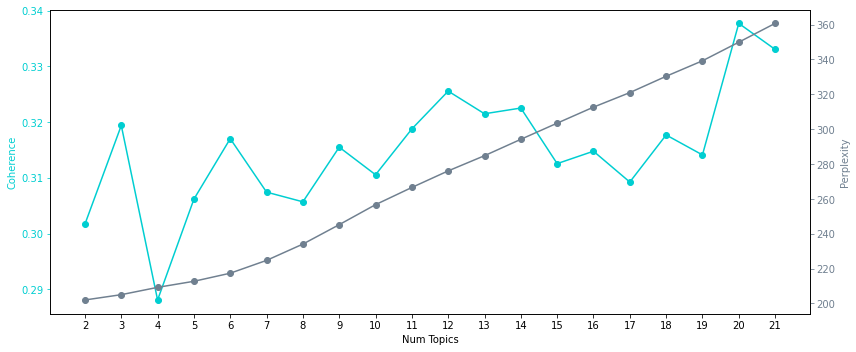

<Figure size 432x288 with 0 Axes>

In [15]:
# evaluation
x = range(start, limit, step)
fig, ax1 = plt.subplots(figsize=(12,5))

# coherence
c1 = 'darkturquoise'
ax1.plot(x, coherence_vals, 'o-', color=c1)
ax1.set_xlabel('Num Topics')
ax1.set_ylabel('Coherence', color=c1); ax1.tick_params('y', colors=c1)

# perplexity
c2 = 'slategray'
ax2 = ax1.twinx()
ax2.plot(x, perplexity_vals, 'o-', color=c2)
ax2.set_ylabel('Perplexity', color=c2); ax2.tick_params('y', colors=c2)

# Vis
ax1.set_xticks(x)
fig.tight_layout()
plt.show()

# save as png
plt.savefig('../images/metrics.png') 

## とりあえず上の結果を受けてトピック数3に設定

In [16]:
# LDA Model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, alpha='auto', random_state=0)

## WordCloud 描写
うん、ダメそう

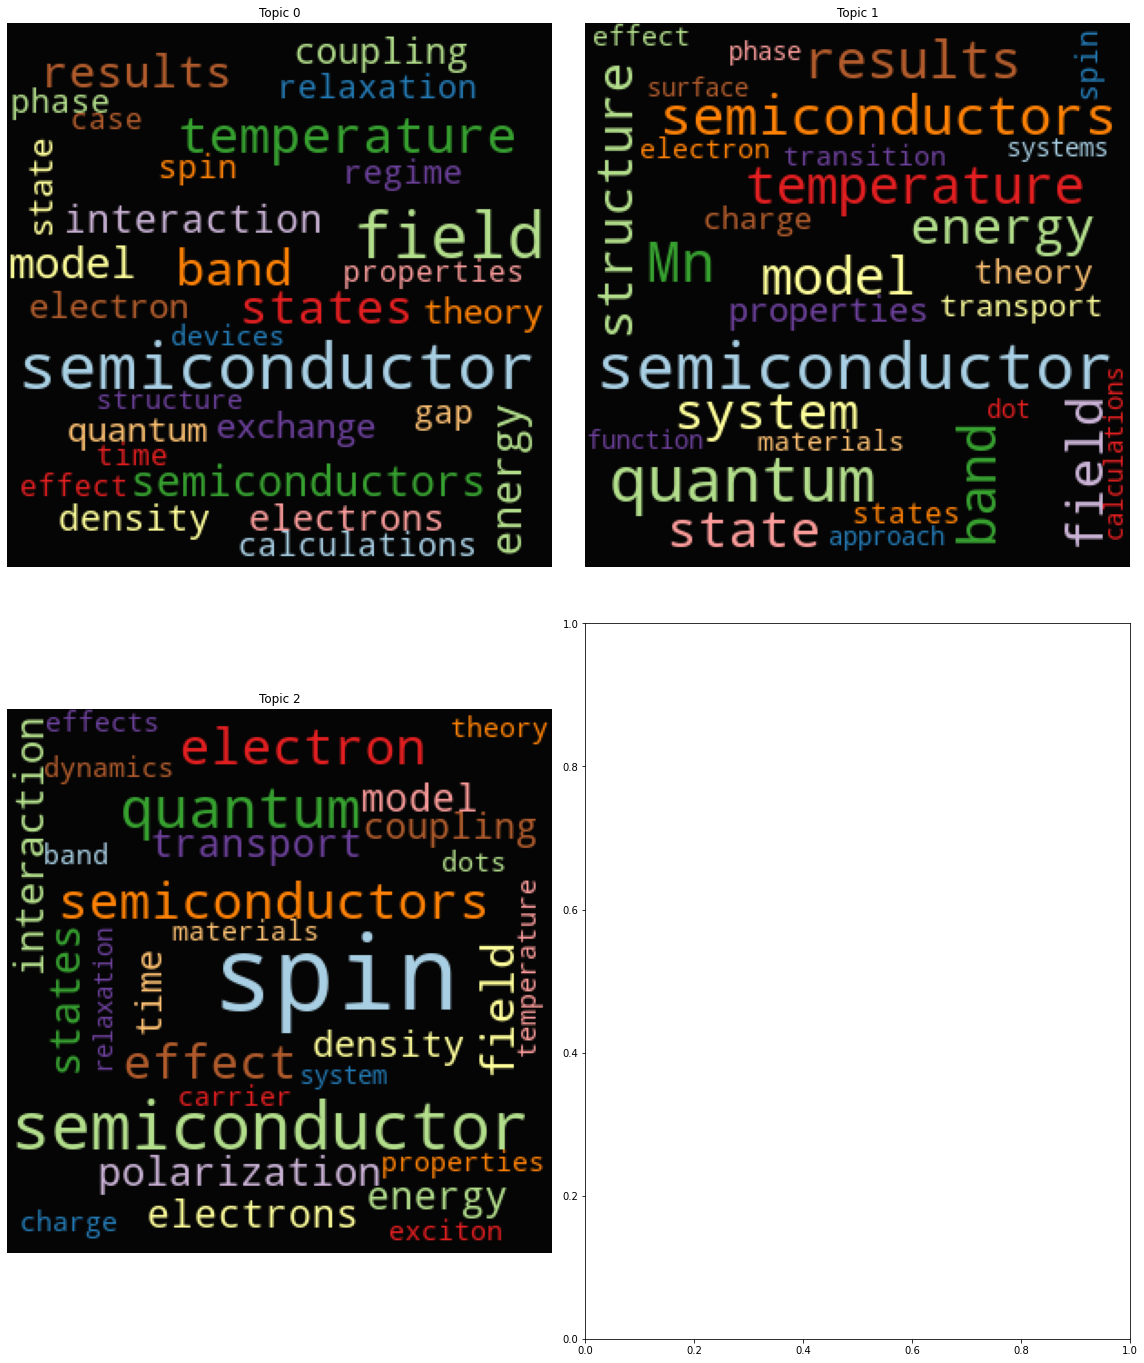

<Figure size 432x288 with 0 Axes>

In [17]:
import math
# WordCloud
fig, axs = plt.subplots(ncols=2, nrows=math.ceil(lda_model.num_topics/2), figsize=(16,20))
axs = axs.flatten()

def color_func(word, font_size, position, orientation, random_state, font_path):
    return 'darkturquoise'

for i, t in enumerate(range(lda_model.num_topics)):

    x = dict(lda_model.show_topic(t, 30))
    im = WordCloud(
        background_color='black',
        color_func=color_func,
        max_words=4000,
        width=300, height=300,
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t))

# vis
plt.tight_layout()
plt.show()

# save as png
plt.savefig('wordcloud.png') 

## せっかくなので puLDAvis で可視化（PCoA, MDS, t-SNE）

In [18]:
# pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

# Vis PCoA
vis_pcoa = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
vis_pcoa

# save as html
pyLDAvis.save_html(vis_pcoa, '../html_pyldavis/pyldavis_output_pcoa.html')

In [21]:
# Vis Metric MDS
vis_mds = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, mds='mmds', sort_topics=False)
vis_mds

# save as html
pyLDAvis.save_html(vis_mds, '../html_pyldavis/pyldavis_output_mds.html')

In [23]:
# Vis t-SNE
vis_tsne = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, mds='tsne', sort_topics=False)
vis_tsne

# save as html
pyLDAvis.save_html(vis_tsne, '../html_pyldavis/pyldavis_output_tsne.html')